In [1]:
import pandas as pd
import geopandas as gpd

### Cargo datos e info geografica

In [2]:
df = pd.read_csv('./archive/train.csv')

# Poligonos de distritos tomados de:
# https://data.sfgov.org/Public-Safety/Historical-Police-Districts/embj-38bg
gdf = gpd.read_file('./PoliceDistricts.geojson')

In [3]:
df.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [4]:
gdf.head(2)

,company,district,objectid,geometry
0,A,CENTRAL,1,"MULTIPOLYGON (((-122.40532 37.80687, -122.4044..."
1,B,SOUTHERN,2,"MULTIPOLYGON (((-122.38822 37.79000, -122.3880..."


In [5]:
df[['X', 'Y']].describe() # ojo que hay outliers

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [6]:
## En el dataset tenemos distritos
df.PdDistrict.value_counts().sort_index()

BAYVIEW        89431
CENTRAL        85460
INGLESIDE      78845
MISSION       119908
NORTHERN      105296
PARK           49313
RICHMOND       45209
SOUTHERN      157182
TARAVAL        65596
TENDERLOIN     81809
Name: PdDistrict, dtype: int64

In [7]:
# En ambos casos son 10 distritos. Con suerte podemos usar sus nombres para mergear la info con los poligonos

In [8]:
gdf.district.nunique()

10

In [9]:
df.PdDistrict.nunique()

10

### Ejemplito: Contar casos por distrito. Mergear info de poligonos y graficar.

<AxesSubplot:>

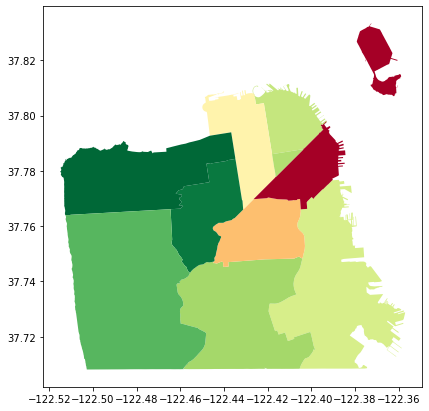

In [10]:
## Cuento casos por distrito
count_by_district = df.groupby(['PdDistrict']).size().reset_index()
count_by_district.columns = ['PdDistrict', 'count'] # Acomodo nombre de columnas

# Mergeo. Info con poligonos.
count_by_district = count_by_district.merge(gdf, left_on = 'PdDistrict', right_on = 'district')

# count_by_district es un pandas DF. Hay que volver a hacerlo geopandas DF.
count_by_district = gpd.GeoDataFrame(count_by_district)

# ya puedo graficar:
count_by_district.plot('count', cmap = 'RdYlGn_r', figsize = (7, 7))